In [1]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(9,6))

for ifo in ['H1']:
    # Read data and remove low frequency content
    l1 = Merger("GW170814").strain(ifo)
    l1 = highpass_fir(l1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(l1), 1.0 / l1.duration)

    # whiten
    white_strain = (l1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 20, 8)
    smooth = lowpass_fir(white_strain, 250, 8)
    smooth = smooth[131072*10/30:131072*20/30]*10**-2
    smooth_array =np.array(smooth)
    smooth_list = smooth_array.tolist()
    max_index = smooth_list.index(max(smooth_list))
    
    # time shift and flip L1
#    if ifo == 'H1':
#        smooth *= -1
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times[max_index-36:max_index-16], smooth[max_index-36:max_index-16], label=ifo, color = 'darkorange')

pylab.legend(fontsize=15)
#pylab.xlim(1186741861.50, 1186741861.55)

#pylab.ylim(0.5*-10**-21, 0.5*10**-21)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

<Figure size 900x600 with 1 Axes>

(1, 2, 11)

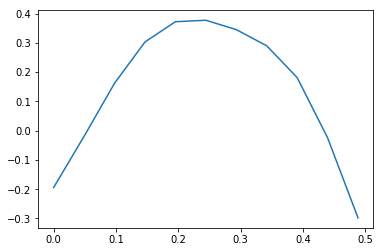

In [2]:
import numpy as np
array_smooth = np.array(smooth)
list_smooth = array_smooth.tolist()
max_index = list_smooth.index(max(array_smooth))

ttemp = np.array(smooth.sample_times[max_index-36:max_index-14]) - np.array(smooth.sample_times[max_index-36])
htemp = smooth[max_index-36:max_index-14]
t = []
h = []
X = []

for i in range(len(ttemp)/2):
    t.append(ttemp[2*i]*100)
for i in range(len(htemp)/2):
    h.append(htemp[2*i])

X0 = []


X0.append([t,h])

plt.plot(t,h)
np.array(X0).shape

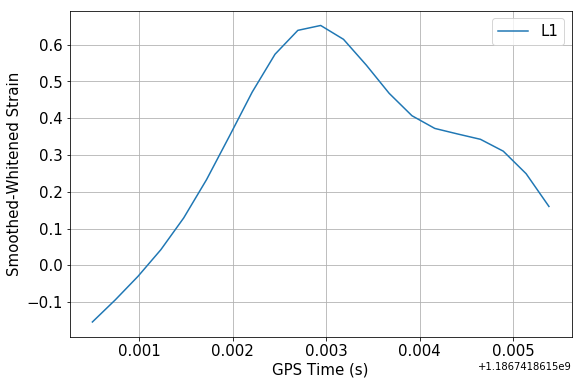

In [3]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(9,6))

for ifo in ['L1']:
    # Read data and remove low frequency content
    h1 = Merger("GW170814").strain(ifo)
    h1 = highpass_fir(h1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)
    smooth = smooth[131072*10/30:131072*20/30]*10**-2
    smooth_array =np.array(smooth)
    smooth_list = smooth_array.tolist()
    max_index = smooth_list.index(max(smooth_list))
    
    # time shift and flip L1
#    if ifo == 'H1':
#        smooth *= -1
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times[max_index-10:max_index+11], smooth[max_index-10:max_index+11], label=ifo)

pylab.legend(fontsize=15)
#pylab.xlim(1186741861.50, 1186741861.55)
#pylab.ylim(0.5*-10**-21, 1*10**-21)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

[1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09]
[0.23291744 0.3509665  0.47108737 0.57408865 0.63909109 0.65238982
 0.61469419 0.54449893 0.4678378  0.40679175 0.37228326]
19851


(2, 2, 11)

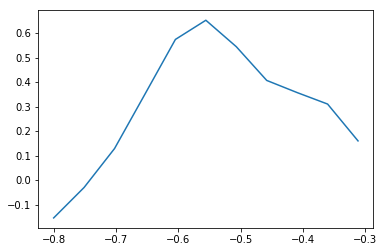

In [4]:
import numpy as np
array_smooth = np.array(smooth)
list_smooth = array_smooth.tolist()
max_index = list_smooth.index(max(array_smooth))
print(smooth.sample_times[max_index-5:max_index+6])
print(smooth[max_index-5:max_index+6])
#plt.plot(smooth.sample_times[max_index-5:max_index+6], smooth[max_index-5:max_index+6])
print(max_index)

ttemp = np.array(smooth.sample_times[max_index-10:max_index+12]) - np.array(smooth.sample_times[max_index-10])-0.008
htemp = smooth[max_index-10:max_index+12]
t = []
h = []

for i in range(len(ttemp)/2):
    t.append(ttemp[2*i]*100)
for i in range(len(htemp)/2):
    h.append(htemp[2*i])



X0.append([t,h])
plt.plot(t,h)
X.append(X0)

np.array(X0).shape

In [8]:
#X[0][0][0]=[0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]
#X[0][1][0]=np.array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])+0.8
#X[0][2][0]=np.array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])-0.6
print(X[0][0][0])
print(X[0][1][0])
print(X[0][0][1])
print(X[0][1][1])
np.save('X_injection_real_hl.npy', X)


[0.0, 0.048828125, 0.09765625, 0.146484375, 0.1953125, 0.244140625, 0.29296875, 0.341796875, 0.390625, 0.439453125, 0.48828125]
[-0.8, -0.751171875, -0.70234375, -0.653515625, -0.6046875, -0.555859375, -0.50703125, -0.45820312500000004, -0.40937500000000004, -0.36054687500000004, -0.31171875000000004]
[-0.19421964052221277, -0.019226545883296867, 0.16194711461715205, 0.30303502783745084, 0.37221628105838134, 0.37722458828186733, 0.34522623224374344, 0.2898902011907051, 0.18136143122941165, -0.02448478175461455, -0.29822110415573466]
[-0.1542604524019368, -0.029961228023719304, 0.12881556555036683, 0.35096649847902966, 0.5740886549009815, 0.6523898225442827, 0.544498925584289, 0.4067917530687536, 0.35718036429249184, 0.3103711031664598, 0.15999794104878332]


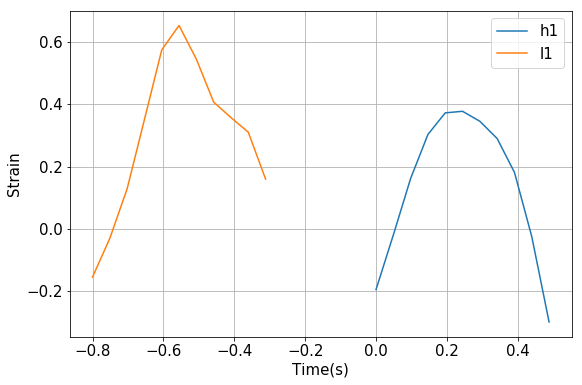

In [7]:
fig= plt.figure(figsize=(9,6))

plt.plot(X[0][0][0],X[0][0][1], label = 'h1')
plt.plot(X[0][1][0],X[0][1][1], label = 'l1')
plt.legend(fontsize=15)
pylab.ylabel('Strain', fontsize=15)
pylab.grid()
pylab.xlabel('Time(s)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

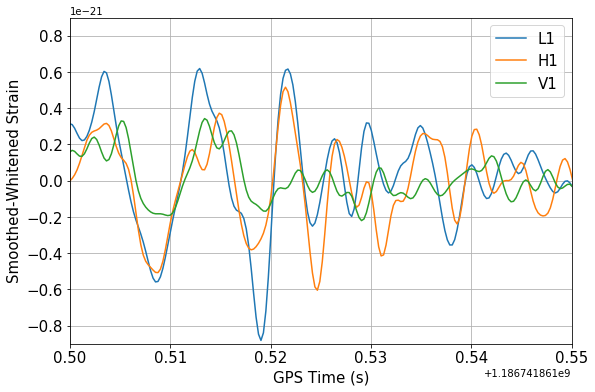

In [3]:
# from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(9,6))
for ifo in ['L1','H1','V1']:
    # Read data and remove low frequency content
    l1 = Merger("GW170814").strain(ifo)
    l1 = highpass_fir(l1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(l1), 1.0 / l1.duration)

    # whiten
    white_strain = (l1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 20, 8)
    smooth = lowpass_fir(white_strain, 250, 8)*10**-23

    # time shift and flip L1
    if ifo == 'H1':
        smooth *= -1
        smooth.roll(int(-.008 / smooth.delta_t))
    if ifo == 'V1':
        smooth.roll(int(-.014 / smooth.delta_t))
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times, smooth, label=ifo)

pylab.legend(fontsize=15)
pylab.xlim(1186741861.50, 1186741861.55)

pylab.ylim(-90*10**-23, 90*10**-23)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

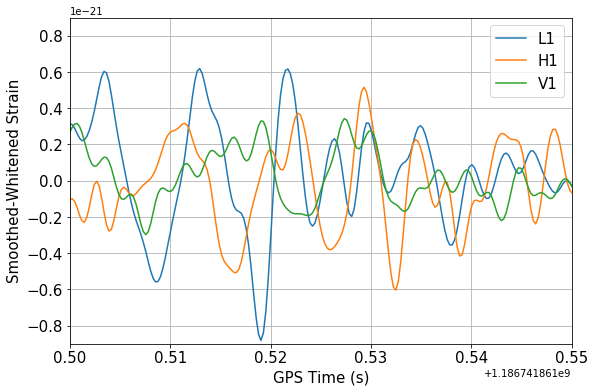

In [21]:
# from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(9,6))
for ifo in ['L1','H1','V1']:
    # Read data and remove low frequency content
    l1 = Merger("GW170814").strain(ifo)
    l1 = highpass_fir(l1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(l1), 1.0 / l1.duration)

    # whiten
    white_strain = (l1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 20, 8)
    smooth = lowpass_fir(white_strain, 250, 8)*10**-23

    # time shift and flip L1
    if ifo == 'H1':
        smooth *= -1
#        smooth.roll(int(-.008 / smooth.delta_t))
#    if ifo == 'V1':
#        smooth.roll(int(-.014 / smooth.delta_t))
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times, smooth, label=ifo)

pylab.legend(fontsize=15)
pylab.xlim(1186741861.50, 1186741861.55)

pylab.ylim(-90*10**-23, 90*10**-23)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

In [12]:
np.array([1,2,3])-np.array([1])

array([0, 1, 2])

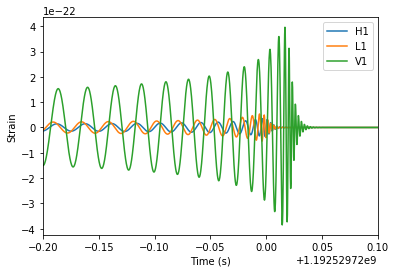

In [29]:
import pylab
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector

apx = 'SEOBNRv4'
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.
hp, hc = get_td_waveform(approximant=apx,
                         mass1=30,
                         mass2=30,
                         spin1z=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         delta_t=1.0/4096,
                         f_lower=20,
                         distance = 600)

det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
#       Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.
end_time = 1192529720
declination = -0.7845255
right_ascension = 0.83339472
polarization = 3
hp.start_time += end_time
hc.start_time += end_time

signal_h1 = det_h1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_l1 = det_l1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_v1 = det_v1.project_wave(hp, hc,  right_ascension, declination, polarization)

pylab.plot(signal_h1.sample_times, signal_h1, label='H1')
pylab.plot(signal_l1.sample_times, signal_l1, label='L1')
pylab.plot(signal_v1.sample_times, signal_v1, label='V1')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.xlim(end_time-0.2,end_time+0.1)
pylab.legend()
pylab.show()

In [28]:
hl_train_temp = np.load('X_6_29_train600mpc.npy')
hl_test_temp = np.load('X_6_29_test600mpc.npy')
hl_train = []
hl_test = []

for i in range(12960):
    
    hl_train.append([hl_train_temp[0][0],hl_train_temp[0][1]])
    
    hl_test.append([hl_test_temp[0][0],hl_test_temp[0][1]])
print(np.array(hl_train).shape)
print(np.array(hl_test).shape)
np.save('X_6_29_hltrain600mpc.npy', hl_train)
np.save('X_6_29_hltest600mpc.npy', hl_test)

(12960, 2, 2, 11)
(12960, 2, 2, 11)
